<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Week5/ET5003_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [647]:
#@title Current Date
Today = '2021-10-19' #@param {type:"date"}


In [648]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
Student_ID_Name = "Conor O'Mara 20151845" #@param {type:"string"}
Student_ID_Name = "Morgan Lynch" #@param {type:"string"}
Student_ID_Name = "Aziz Aoudjit" #@param {type:"string"}
#@markdown ---

In [649]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

In [650]:
# Introduction

# Introduction

## Problem description & theory

This etivity approaches a machine learning problem to predict house prices using both Bayesian multinomial piecewise regression model and Bayesina Neural Network. The dataset is very similar to the previous etivity, however the addition of a Neural network is new.


However, the approach here goes further to use **NLP** (natural language processing through the package `nltk`) in an approach to derive features that can be used to train a regression model and neural network.

The prediction are then submitted to [Kaggle](www.kaggle.com) and used in a leaderboard to rank the predictions from each student's models.



## Method



1.   Expoloratory data analysis (clean data, impute values, drop features, remove outliers, perform mappings and transform distributions)
2.   NLP feature derviation. Using NLP on both `Description` and `Features`, more features are derived which have been extracted from these columns.
3. Train a Bayesian regression model, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle.
4.  Cluster the data using KMeans, to find the optimal number of clusters K (using inertia and the Silhouette metric). Train a Bayesian piecewise regression model with K segments, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle
5. Train a Bayesian Neural Network, calculate the error on the validation data, make predictions on the test data, save the predictions and submit to Kaggle.
6. Compare the performance of all the models.



## Modelling

### Piecewise Regression

Piecewise regression is a useful approach when the data follows differe $y(x)$ could be split into 3 piecewise divided functions such as for nb break points:
$$ \eta_{1} + \beta_{1}(x - b_{1} ), b_{1} < x \leq b_{2} $$
$$ \eta_{1} + \beta_{2}(x - b_{2} ), b_{2} < x \leq b_{3} $$
$$ \eta_{1} + \beta_{nb}(x - b_{nb - 1} ), b_{nb - 1} < x \leq b_{nb} $$

These separate models are easy to solve (using Pymc3) as we found out in etivity 1, however finding the breakpoints is a new step. To do this we can use the Gaussiam mixture clustering method to cluster the data on features and the get the centroids of these clusters to predict what cluster every data point belongs to and there use it to train and fit its regression model. It is a very understandable approach to a problem without increasing the complexity of the model while also not underfitting it with a simple regression model. We have separate values and training routines for $\alpha{i}$ and $\beta_{i}$ for each model.

### Bayesian Neural Network
Neural networks consist of an input layer, hidden layers, nodes, weights, activation functoins and an error function whicih we use to perform gradient descent. Non-linearity is added in the hidden layers, and after transforming it with the activation function in the output layer the model gives us point estimates with no uncertainty information. (Srihari, 2017). In order to obtain uncertainy, we can introduce the Bayesian neural network. A network with infinitely many weight with a distribution on each weight being a ***Gaussian process***. The same network with finitely many weights is know as a ***Bayesian Neural network*** (Chang, 2021).

### Etivity approach
In this etivity we use regression to predict the house prices given the training dataset. But first the data preparation and EDA approach will prepare the dataset for learning. Using thise dataset we will train a full regression model and then a piecewise regression model (where we will find the optimum number of clust 'Mean absolute error' and 'Mean absolute percentage error:
$$ \text{MAE} = \frac{1}{n}\Sigma_{i=1}^{n}|{y_{i} - \hat{y_{i}}}| $$
$$ \text{MAPE} = \frac{1}{n}\Sigma_{i=1}^{n}|\frac{{y_{i} - \hat{y_{i}}}}{y_{i}}| $$

## Dataset
The data we have in this problem is historical housing data including their prices. There is almost 3000 data points on houses sold in Ireland that we can use for training and 500 that we can use as test data. The target variable is price(or expected price) that we will try to predict using other features we have such as:


*   bathrooms
*   bedrooms
*   area
*   beds
*   ber_classification
*   description block
*   facility
* services
* features 
* latitude
* longitude
* type
* surface

Using these features, the training dataset can be prepocessed in order to be prepared for machine learning in order to make predictions as to what the price of a house might be.

From analysing these features, we identify outliers in `surface`, `latitude`, `longitude`, which we remove from the training data and then distribution and boxplot together to inspect if there are any outliers remaining.

# Imports

In [651]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [652]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [653]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [654]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import cluster

In [655]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

In [656]:
!pip install gpy

In [657]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns

In [658]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(context='notebook', style='ticks', palette='Accent', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# DATASET

We start off by loading the training and test dataset, and have a look at some statistics from the data

## Training & Test Data

### Google drive file paths and IO

In [659]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/house-data/'

training_file = Path + 'HousePrice_Train.csv'
testing_file = Path + 'HousePrice_Test.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)


print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (1638, 14)
Test Data Shape: (702, 13)


### Train dataset

In [660]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [661]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [662]:
def show_nulls(df: pd.DataFrame):
  """
  This function takes a dataframe and returns the number of nulls in each column and the percentage of 
  nulls in a column too.
  """
  nulls = pd.DataFrame(df.isna().sum())
  nulls.rename(columns = {0:'Number of Nulls'}, inplace = True) 
  nulls['% of Nulls'] = nulls['Number of Nulls']/df.shape[0]*100
  cols_with_nulls = nulls[nulls['Number of Nulls'] > 0].T.columns.tolist()
  return nulls

In [663]:
show_nulls(dftrain)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,251,15.323565
Description,0,0.000000
Services,1061,64.774115
Features,0,0.000000
Latitude,0,0.000000


### Test dataset

In [664]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [665]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [666]:
show_nulls(dftest)

,Number of Nulls,% of Nulls
Index,0,0.000000
ID,0,0.000000
Location,0,0.000000
Num_Bathrooms,0,0.000000
Num_Beds,0,0.000000
BER_class,108,15.384615
Description,0,0.000000
Services,456,64.957265
Features,0,0.000000
Latitude,0,0.000000


### Mapping the BER classification

Both the train and test datasets contain nulls in the `BER_class` feature. Let's map this to ordinal values (the scale has an inherent order in it: https://www.seai.ie/home-energy/building-energy-rating-ber/understand-a-ber-rating/). A1 being most efficient.

In [667]:
dftrain['BER_class'].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [668]:
dftest['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
A2                      8
SINo666of2006exempt     8
B1                      7
Name: BER_class, dtype: int64

In [669]:
# define a scaler mapper that defines values
dBERClassificationMap = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt" : 16
}
dftrain['BER_class'] = dftrain['BER_class'].replace(dBERClassificationMap)
dftest['BER_class'] = dftest['BER_class'].replace(dBERClassificationMap)

In [670]:
# approach missing values with the median ()
print(f"Train BER median = {dftrain['BER_class'].median()}")
print(f"Test BER median = {dftest['BER_class'].median()}")

Train BER median = 10.0
Test BER median = 10.0


In [671]:
# Impute missing values with the median
dftrain['BER_class'].fillna(10, inplace=True)
dftest['BER_class'].fillna(10, inplace=True)

In [672]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,8.0,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,12.0,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,15.0,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,2.0,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,14.0,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


The BER class has now been mapped to ordinal values.

### Hot Encoding the `Type` feature

In [673]:
dftrain = pd.get_dummies(dftrain, columns=['Type'])
dftest = pd.get_dummies(dftest, columns=['Type'])

In [674]:
dftrain.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
0,1,12409116,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0
1,2,12320330,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0
2,3,12405953,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0
3,4,12202582,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0
4,5,12299336,Lusk,3,4,10.0,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,510000,0,0,1,0,0,0,0,0,0,0


### Removing outliers

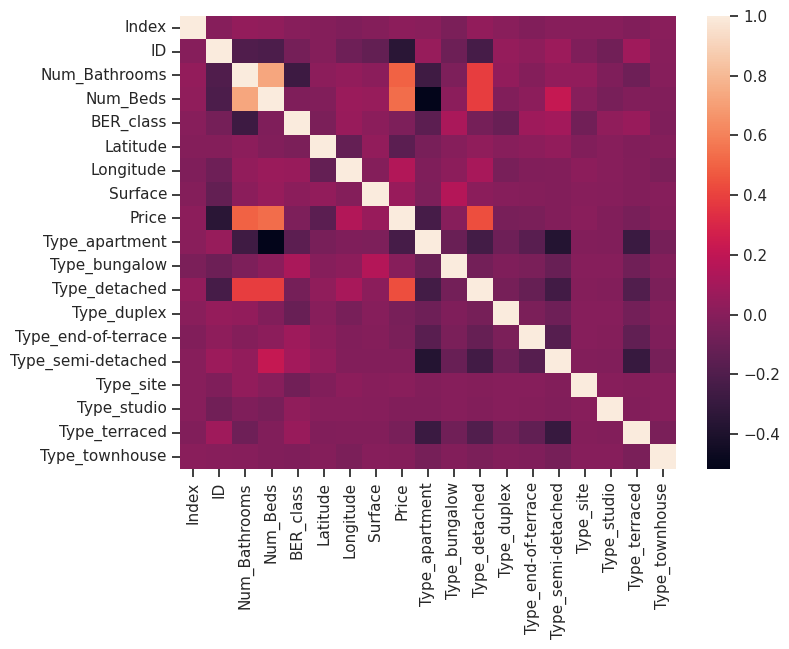

In [675]:
sns.heatmap(dftrain.corr(), annot=False);

We see strong correlations for Price with `Type_detached`, `Num_Beds`, `Num_bathrooms`.

In [676]:
def plot_distribtion(df, feature):
    """
    Function plots the histogram and boxplot distribution of the feature side by side.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{feature}')
    sns.histplot(ax=ax1, data=df, x=feature, kde=True)
    sns.boxplot(ax=ax2,data=df,  y=feature, palette="Set2")
    plt.show()

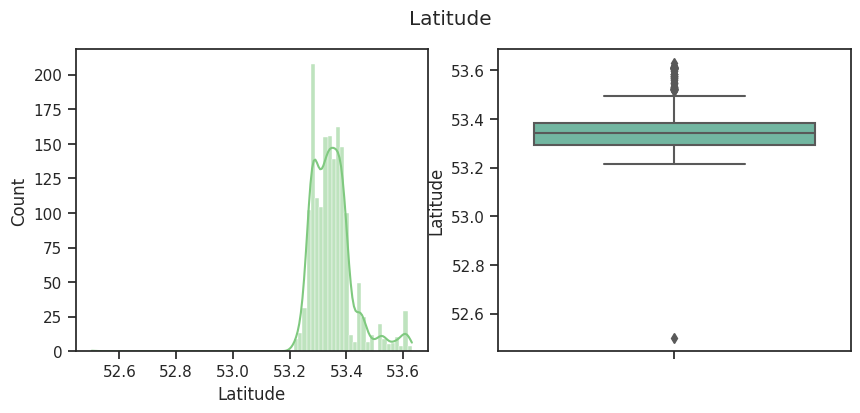

In [677]:
# lots of outliers exist in the longitudinal data
plot_distribtion(dftrain, 'Latitude')

In [678]:
# removing the outliers from the boxplot (outside of the whiskers)
from matplotlib.cbook import boxplot_stats

outliers = [y for stat in boxplot_stats(dftrain['Latitude']) for y in stat['fliers']]

In [679]:
#drop rows that contain any value outliers
dftrain = dftrain[dftrain.Latitude.isin(outliers) == False]

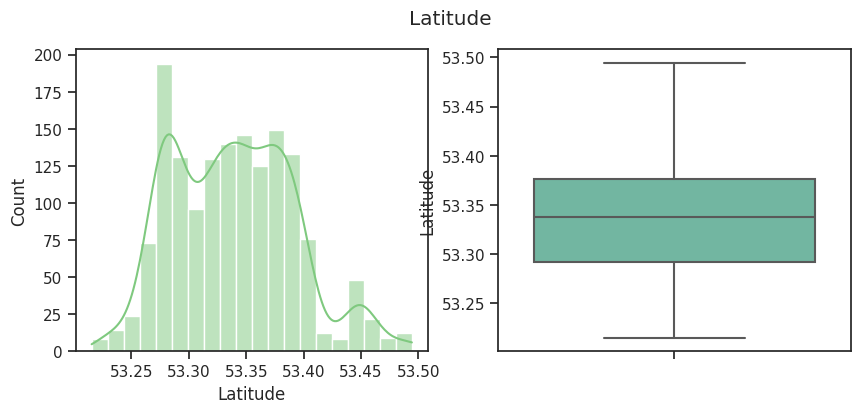

In [680]:
# Plot again with no outliers
plot_distribtion(dftrain, 'Latitude')

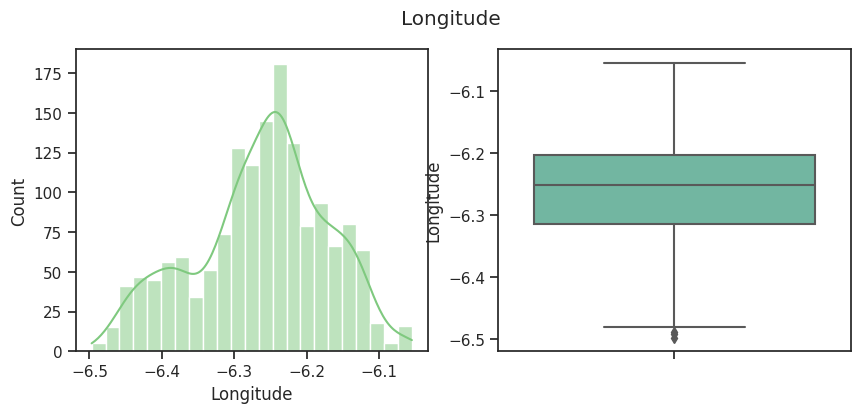

In [681]:
# Plot again with no outliers
plot_distribtion(dftrain, 'Longitude')

In [682]:
outliers = [y for stat in boxplot_stats(dftrain['Longitude']) for y in stat['fliers']]
dftrain = dftrain[dftrain.Longitude.isin(outliers) == False]

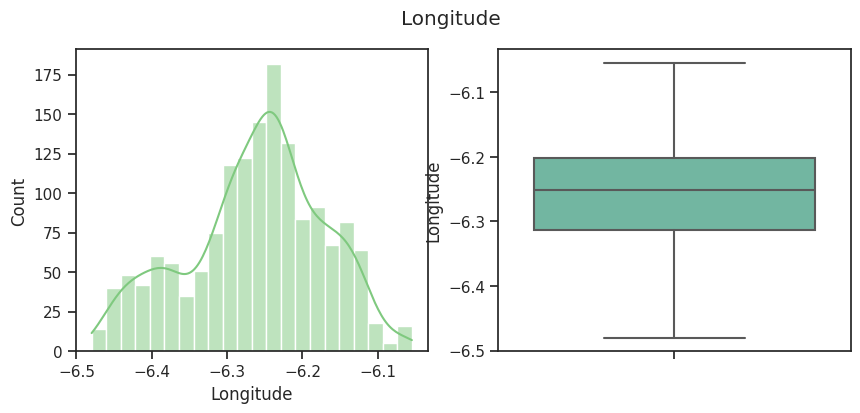

In [683]:
 #Plot again with no outliers
plot_distribtion(dftrain, 'Longitude')

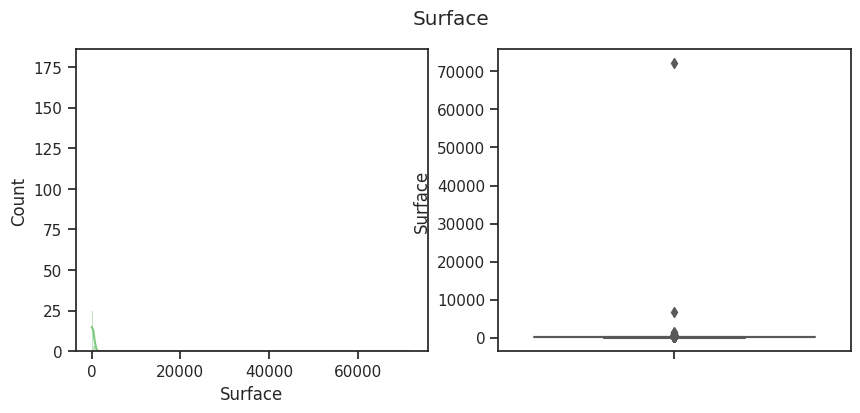

In [684]:
# Surface also has a lot of outliers
plot_distribtion(dftrain, 'Surface')

In [685]:
outliers = [y for stat in boxplot_stats(dftrain['Surface']) for y in stat['fliers']]
dftrain = dftrain[dftrain.Surface.isin(outliers) == False]

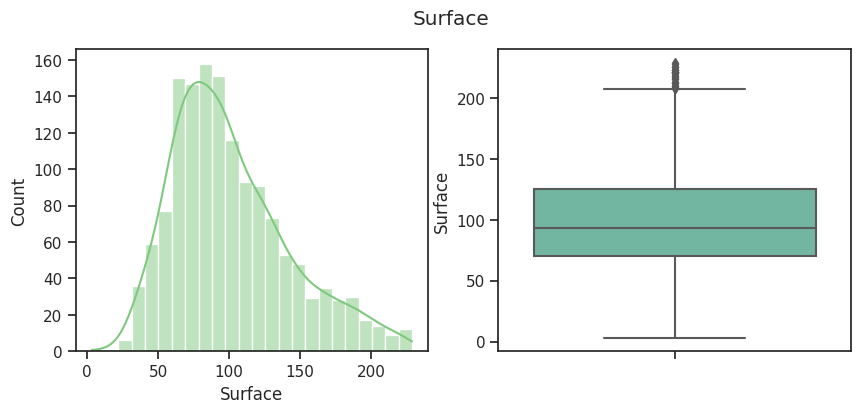

In [686]:
plot_distribtion(dftrain, 'Surface')

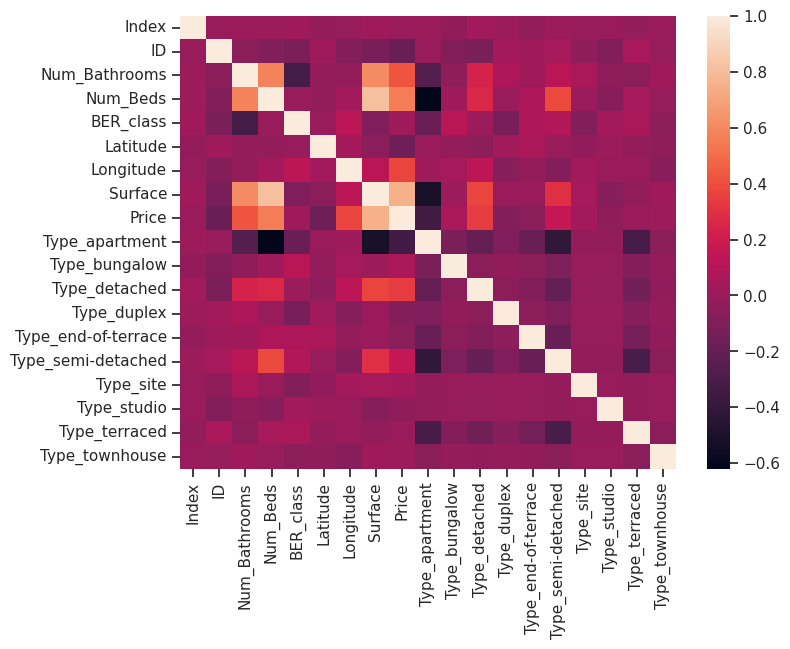

In [687]:
#Look at the correlation between the different features of our data and the house prices. 
sns.heatmap(dftrain.corr(), annot=False);

In [688]:
dftrain['Services'].value_counts()

Parking,Gas Fired Central Heating                                                       103
Parking                                                                                  71
Parking,Gas Fired Central Heating,Wired for Cable Television                             67
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                       58
Parking,Gas Fired Central Heating,Alarm                                                  48
Parking,Wired for Cable Television                                                       34
Gas Fired Central Heating                                                                18
Parking,Alarm                                                                            10
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access     10
Parking,Wired for Cable Television,Oil Fired Central Heating                              8
Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating              

From the correlation matrix after more data prep, `Surface`, `Latitude` now also correlate much better with `Price`.

## NLP modelling

In [689]:
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [690]:
import string
# add the euro sign
string.punctuation = string.punctuation + '€¢'
lStopwords = stopwords.words('english')
lStopwords.append('x')
lEstateAgentSpeak = ['bedroom', 'bathroom', 'kitchen', 'floor', 'heating', 'apartment', 'studio', 'terraced', 'townhouse', 'bungalow', 'duplex', 'end-of-terrace', 'home', 'family', 'entrance', 'hall', 'dining', 'room', 'sink', 'living', 'wash', 'hand', 'basin', 'double']
lEstateAgentSpeak.extend(['washing', 'machine', 'within', 'facing', 'extractor', 'fan', 'hob', 'access', 'delighted', 'present', 'splash', 'window', 'fired', 'door', 'hot', 'press', 'de', 'attachment', 'shower', 'bath', 'would'])
lStopwords.extend(lEstateAgentSpeak)
lStoplist = lStopwords + list(string.punctuation)
stoplist = set(lStoplist)

words = set(nltk.corpus.words.words())

In [691]:
translate_table = dict((ord(char), None) for char in string.punctuation)

def preprocess(sText, translate_table):
  """Preprocess text:  1.  Expand contractions (like "n't")
     2.  Remove punctuation
     3.  Tokenise any strings which are not in the stoplist and not digits
     4.  Convert to lower-case
     """
  return [sWord.lower() for sWord in word_tokenize(sText) if sWord.lower() not in stoplist and sWord.lower() in words and sWord.isalpha()]

In [692]:
dftrain['TokenisedDescription'] = dftrain['Description'].apply(preprocess,translate_table=translate_table)
dftrain['TokenisedFeatures'] = dftrain['Features'].apply(preprocess,translate_table=translate_table)

dftest['TokenisedDescription'] = dftest['Description'].apply(preprocess, translate_table=translate_table)
dftest['TokenisedFeatures'] = dftest['Features'].apply(preprocess, translate_table=translate_table)

In [693]:
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,1,12409116,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0,"[market, chipping, row, two, comes, market, ex...",[none]
1,2,12320330,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0,"[terrace, charming, red, brick, period, set, s...","[bight, spacious, interior, numerous, original..."
2,3,12405953,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0,"[welcome, cotter, close, immaculately, three, ...","[special, large, rear, garden, generous, stree..."
3,4,12202582,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0,"[welcome, sycamore, walk, enjoying, premier, a...","[wonderful, bed, detached, accommodation, enjo..."
5,6,12225979,Glasnevin,1,3,12.0,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,140.00,360000,0,0,0,0,0,0,0,0,1,0,"[property, team, take, great, pleasure, market...",[none]


In [694]:
from nltk.stem import WordNetLemmatizer

oLemmatizerObj = WordNetLemmatizer()

In [695]:
def lemmatise(lListOfTokens,lemmatizerObj):
  """Apply Lemmatizer to a list of tokens"""
  lReturn = [oLemmatizerObj.lemmatize(sWord) for sWord in lListOfTokens]
  return lReturn

In [696]:
dftrain['LemmatizedDescription'] = dftrain['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftrain['LemmatizedFeatures'] = dftrain['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)


dftest['LemmatizedDescription'] = dftest['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftest['LemmatizedFeatures'] = dftest['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [697]:
dftrain['LemmatizedFeatures'] = dftrain.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])
dftest['LemmatizedFeatures'] = dftest.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])

In [698]:

# Convert descriptions in training data to a list
lTrainingDescriptions = dftrain['LemmatizedDescription'].tolist()
# This will be a list of lists.  Merge into a single list to analyse bigrams and trigrams

lMergedTrainingDescriptions = []
for lDescription in lTrainingDescriptions:
  lMergedTrainingDescriptions.extend(lDescription)

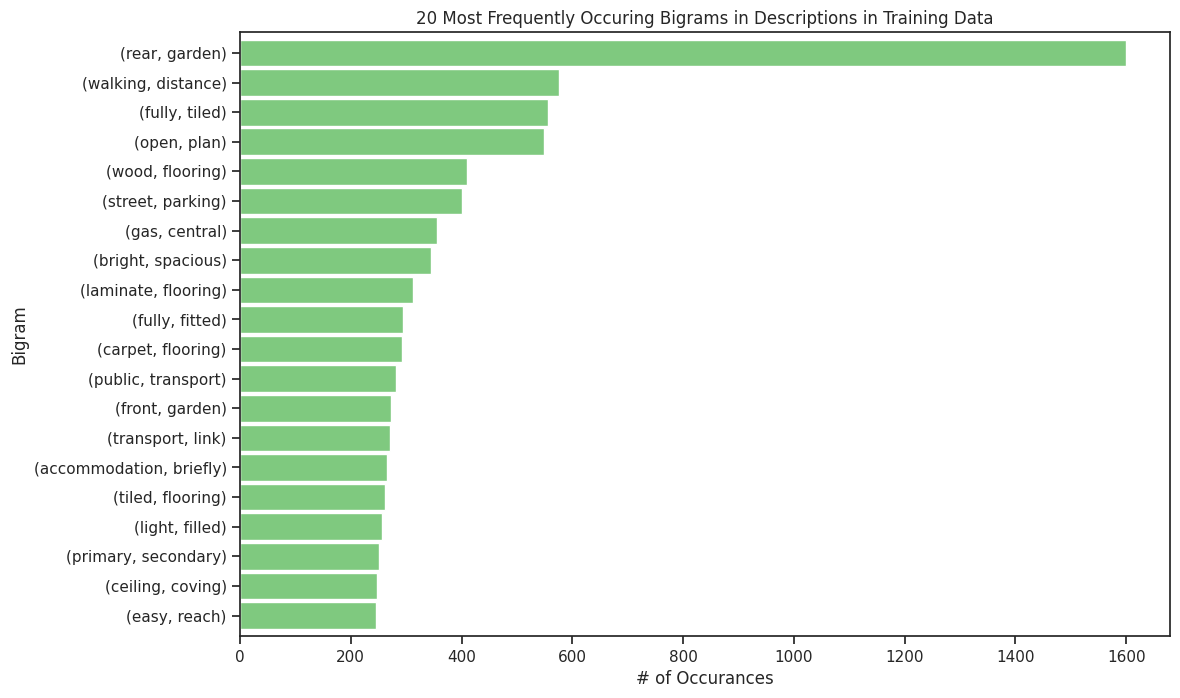

In [699]:
from nltk.util import ngrams
bigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 3)).value_counts())[:20]
bigrams_series.sort_values().plot.barh( width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Descriptions in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

Let's make these 20 bi-grams into features

In [700]:
lFeat = dftrain['LemmatizedFeatures'].tolist()
lF = []
for l in lFeat:
  lF.extend(l)

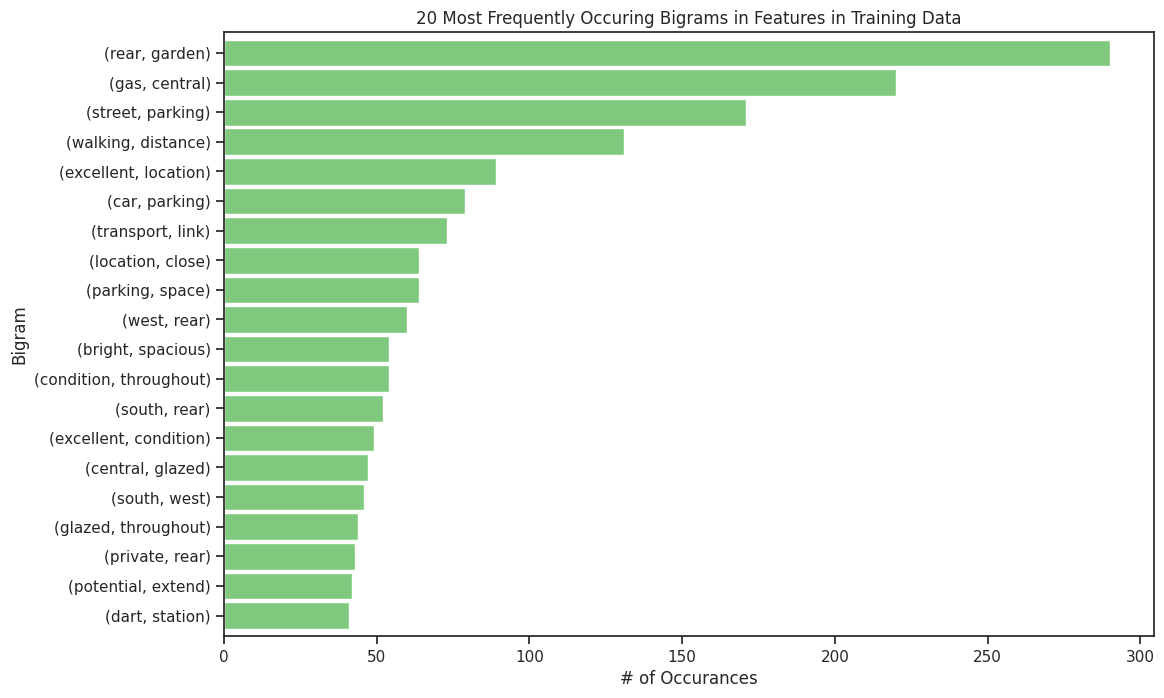

In [701]:

bigrams_series_features = (pd.Series(nltk.ngrams(lF, 2)).value_counts())[:20]
trigrams_series_features = (pd.Series(nltk.ngrams(lF, 3)).value_counts())[:20]
bigrams_series_features.sort_values().plot.barh(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Features in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

In [702]:
dftrain['LemmatizedDescriptionString'] = dftrain['LemmatizedDescription'].str.join(' ')
dftest['LemmatizedDescriptionString'] = dftest['LemmatizedDescription'].str.join(' ')
dftrain['LemmatizedFeaturesString'] = dftrain['LemmatizedFeatures'].str.join(' ')
dftest['LemmatizedFeaturesString'] = dftest['LemmatizedFeatures'].str.join(' ')

In [703]:
dftrain['DescriptionAndFeatures'] = dftrain['LemmatizedDescriptionString'] + dftrain['LemmatizedFeaturesString']
dftest['DescriptionAndFeatures'] = dftest['LemmatizedDescriptionString'] + dftest['LemmatizedFeaturesString']

### TF IDF vectorisation to exclude most prevalent and least common words.

In [704]:
from  sklearn.feature_extraction.text import TfidfVectorizer
oTfIdf = TfidfVectorizer(min_df=0.05, max_df=0.95,ngram_range=(2,3))


In [705]:
npTfIdfTrain = oTfIdf.fit_transform(dftrain['DescriptionAndFeatures'])
df_tdf_train = pd.DataFrame(npTfIdfTrain.toarray(), columns = oTfIdf.get_feature_names())

In [706]:
npTfIdfTest = oTfIdf.transform(dftest['DescriptionAndFeatures'])
df_tdf_test = pd.DataFrame(npTfIdfTest.toarray(), columns=oTfIdf.get_feature_names())

In [707]:
# drop text features
dftrain.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString', 'LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)
dftest.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString','LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)

In [708]:
dftrain = pd.concat([dftrain,df_tdf_train], axis=1)
dftest  = pd.concat([dftest,df_tdf_test], axis=1)

In [709]:
dftrain.dropna(inplace=True)
dftest.dropna(inplace=True)

In [710]:
dftrain = dftrain.drop(['Location', 'Services'], axis=1)
dftest = dftest.drop(['Location', 'Services'], axis=1)

In [711]:
dftest.shape

(246, 175)

### XGBoost for feature importance

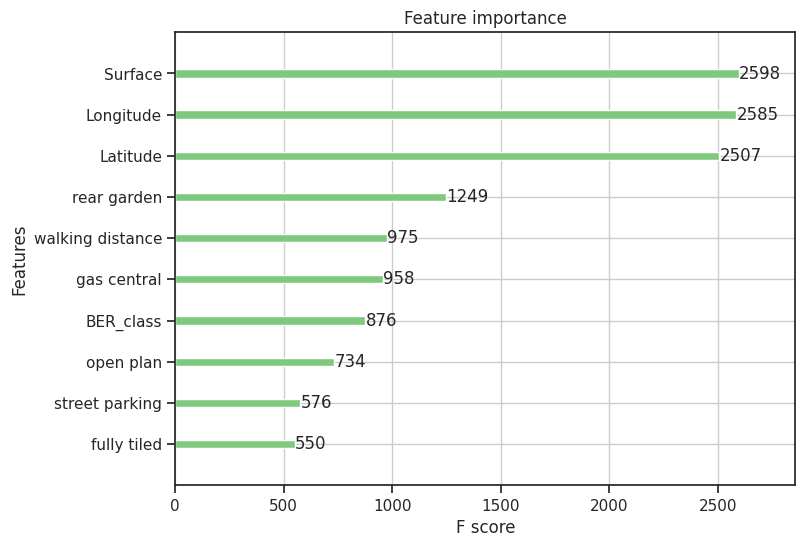

In [712]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

dfTrainCopy = dftrain.copy()
dfTrainIndex = dfTrainCopy['Index']
dfTrainCopy.drop(['Index', 'ID'], axis=1,inplace=True)
# For train/test split, 'price' is our label, so drop this when assigning X
X = dfTrainCopy.drop('Price',axis=1)
y = dfTrainCopy['Price']
X_train,X_validate,y_train,y_validate = train_test_split(X, y, test_size=0.3, random_state=43)
oModel = XGBClassifier()
oModel.fit(X_train, y_train)
# plot feature importance
plot_importance(oModel, max_num_features=10)
plt.show()

In [713]:
FeaturesTrain = ['Surface', 'Longitude', 'Latitude', 'rear garden', 'walking distance', 'gas central', 'BER_class', 'open plan', 'fully tiled', 'street parking']

In [714]:
df_train = dftrain[FeaturesTrain + ['Price']]
df_test = dftest[FeaturesTrain]

In [715]:
df_train.shape

(436, 11)

In [716]:
df_test.shape

(246, 10)

## Prep data for modelling

In [717]:
df_train.shape

(436, 11)

In [718]:
df_test.shape

(246, 10)

In [719]:
# train set, input columns
Xs_full_train = df_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)

Xs_train shape: (436, 10)
ys_train shape: (436,)
Xs_test shape: (246, 10)


In prder to validate our models, we need to perform some kind of validation, Since our test data has no true values, instead we split our training data into train and validation sub-datasets, we can train our models on the training data, and evaluate them on our validation dataset. We can then predict our house prices on the test dataset

In [720]:
#We split the training dataset into training and validation, so we can validate/evaluate the model on the training data
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (348, 10)
y train shape: (348, 1)
X validation shape: (88, 10)
y validation shape: (88,)
X test shape: (246, 10)


In [721]:
Xs_train[1:3,:]

array([[163.        ,  -6.216722  ,  53.362288  ,   0.        ,
          0.        ,   0.2052679 ,  13.        ,   0.        ,
          0.2287039 ,   0.2198381 ],
       [ 75.3       ,  -6.323163  ,  53.33743   ,   0.        ,
          0.21145834,   0.        ,  12.        ,   0.23355298,
          0.        ,   0.        ]])

In [722]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train, Xs_train[:,[2]]**2, Xs_train[:,[3]]**2, (Xs_train[:,[2]]*Xs_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test, Xs_test[:,[2]]**2, Xs_test[:,[3]]**2, (Xs_test[:,[2]]*Xs_test[:,[3]])])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val, Xs_val[:,[2]]**2, Xs_val[:,[3]]**2, (Xs_val[:,[2]]*Xs_val[:,[3]])])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#We don't want to scale or transform our validation true values
yn_val = ys_val

## Bayesian regression

We will start off with a Bayesian full model as a baseline

In [723]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Finished [100%]: Average Loss = 413.55


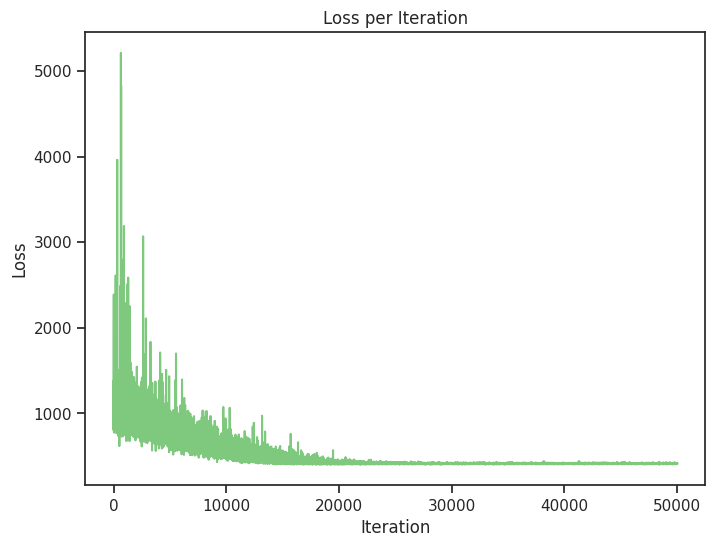

In [724]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [725]:
# samples from the posterior
posterior = approximation.sample(5000)

In [726]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - yn_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - yn_val) / yn_val)))

MAE =  75569.28402672643
MAPE =  0.16715129619613756


We can see from the results of our full model, the Mean Absolute Percentage Error is around 21.8%

In [727]:
#Predict the house prices on our final test data

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_test = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [728]:
#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_test})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df.to_csv(Path + 'BayesianRegressionPredictions/' + f"House Price Prediction_Bayesian_FullModel_{date}.csv", index=False)

### Gaussian Mixture Model 
We need to determine the optimum number of clusters to use

### Determine the number of clusters - K-Means

In [729]:
from sklearn import cluster

inertia = []
for k in range(1,15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    inertia.append(clustered_data_sklearn.inertia_)

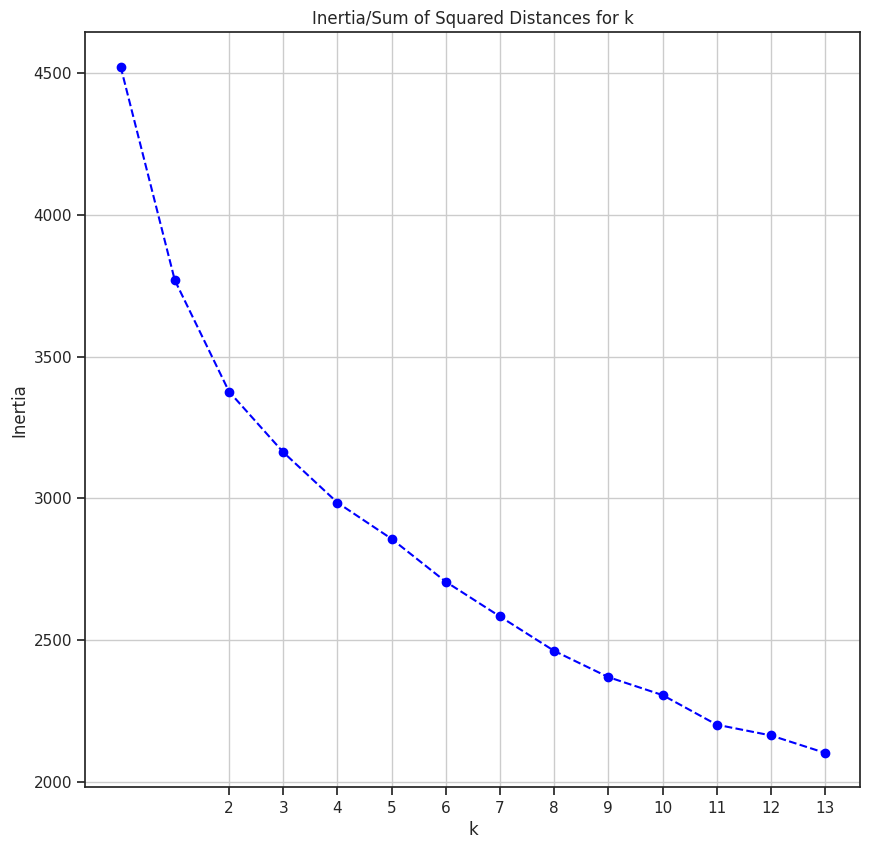

In [730]:
# plot to see if there is a clear elbow
plt.figure(figsize=(10,10))
plt.title('Inertia/Sum of Squared Distances for k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(range(2, 30))
plt.grid()
plt.plot(inertia, linestyle='--', marker='o', color='b')
plt.show()

In [731]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

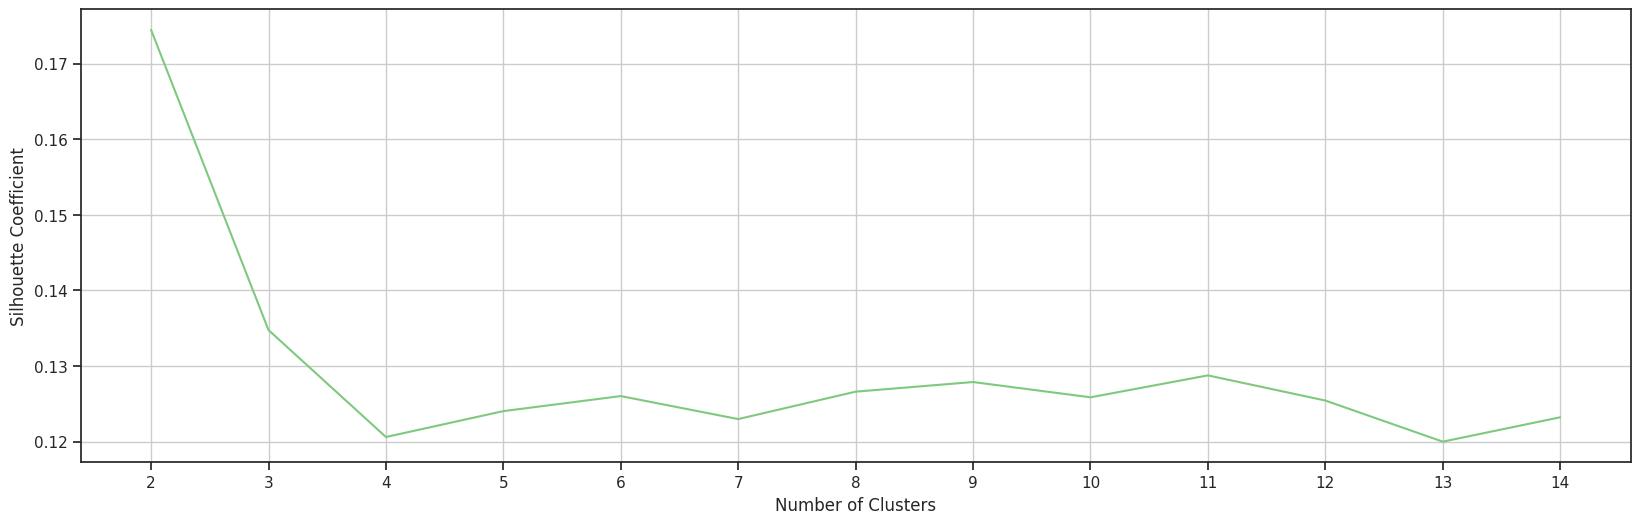

In [732]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

From the plot above, the elbow seems to occur at 5 clusters, so we will use that

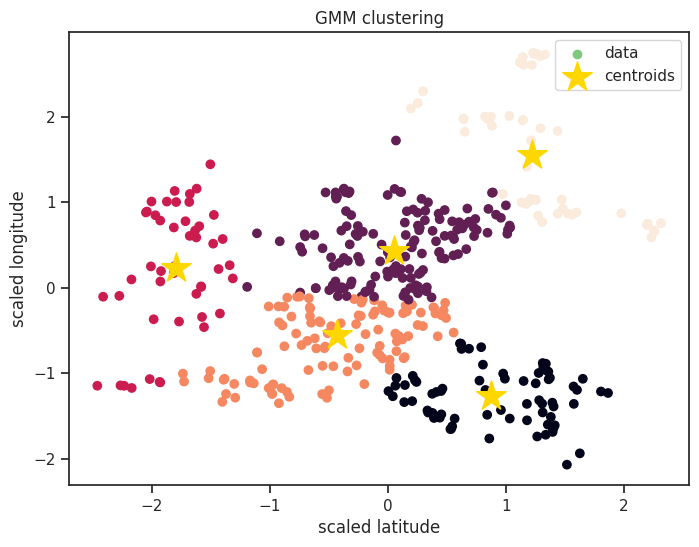

In [733]:
from sklearn.mixture import GaussianMixture
# training gaussian mixture model 
gmm = GaussianMixture(n_components=5)
# clustering by features 2, 3(lat-long)
ind=[1,2]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
labels = gmm.predict(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1], c = labels, label='data')
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='gold', marker='*', s=500, label='centroids')
plt.title('GMM clustering')
plt.ylabel('scaled longitude')
plt.xlabel('scaled latitude')
plt.legend()
plt.show()


### Generating Clusters of Data

In [734]:
# split the data for train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 58, 1: 118, 2: 40, 3: 93, 4: 39}

In [735]:
# split the data for validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 18, 1: 30, 2: 7, 3: 22, 4: 11}

In [736]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [737]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]

ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [738]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [739]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [740]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_val[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

## Piecewise Model
Train a different model on each of the clusters individually

In [741]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 127.65


In [742]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 168.72


In [743]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 121.58


In [744]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 132.51


In [745]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 114.27


## Simulations
We review how the predicted values from the model compare with the true values using posterior predictive checks

In [746]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



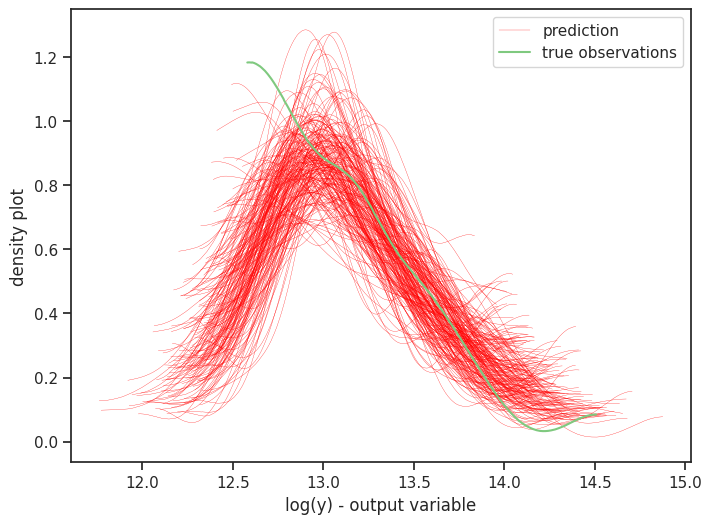

In [747]:
#Simulation CLuster 0
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

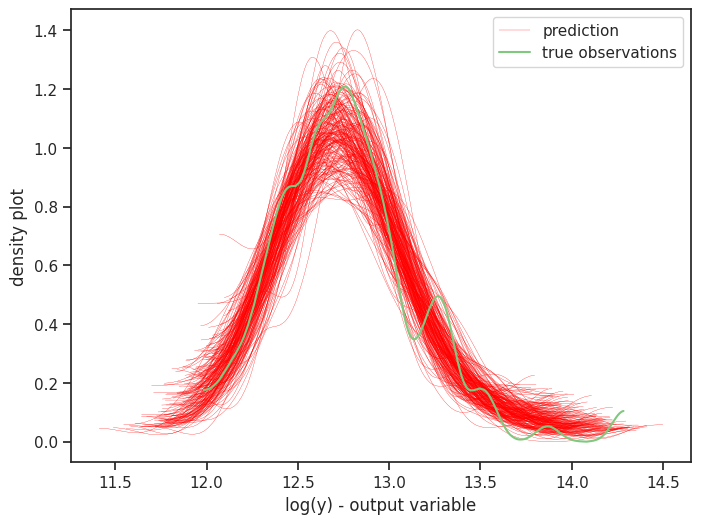

In [748]:
#Simulation Cluster 1
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

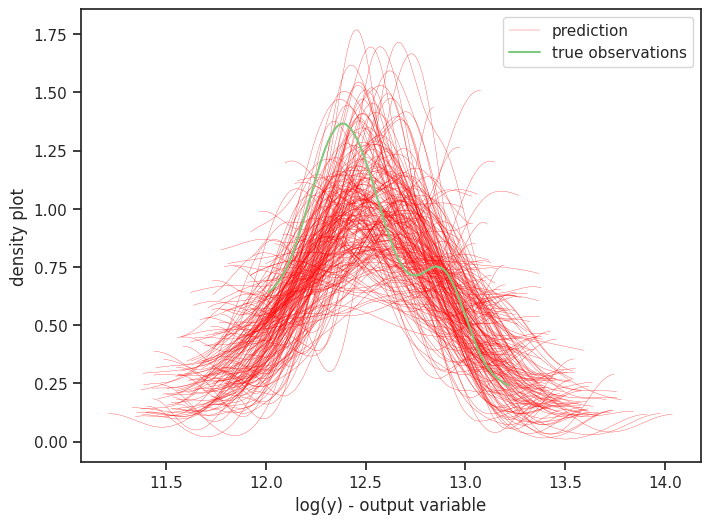

In [749]:
#Simulation Cluster 2
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

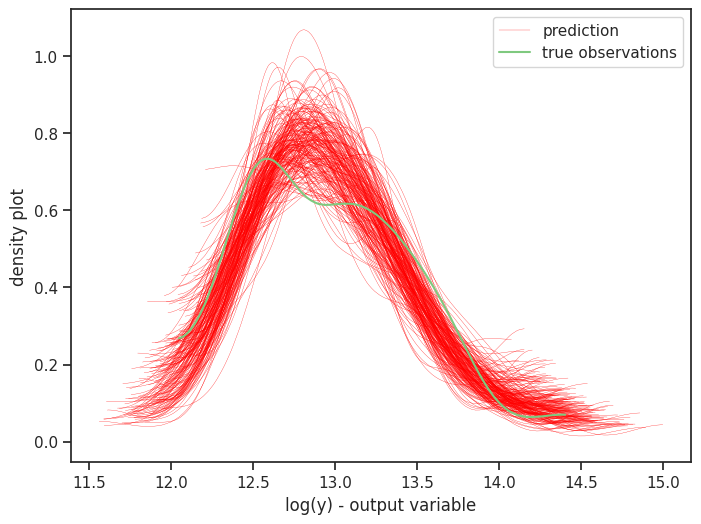

In [750]:
#Simulation Cluster 3
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

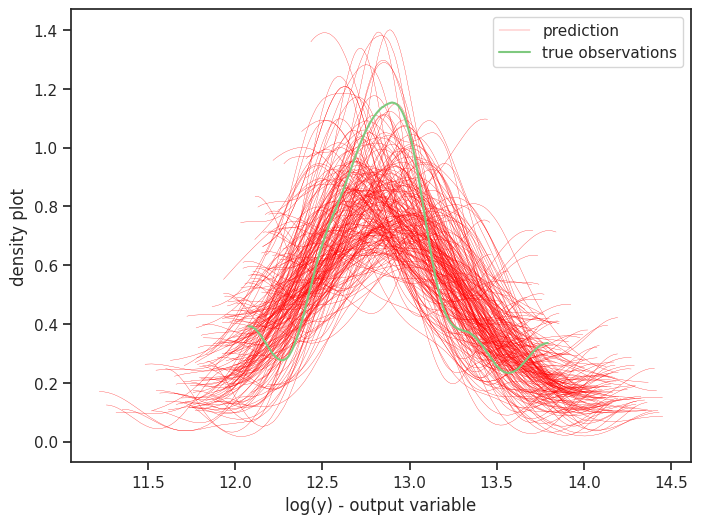

In [751]:
#Simulation Cluster 4
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

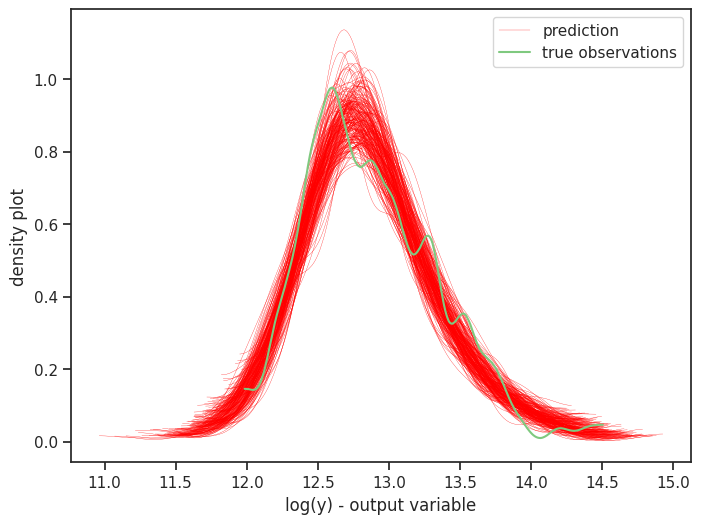

In [752]:
#Simulation on all clusters combined
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Evaluate Performance on Validation Dataset

In [753]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", \nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3])))

# cluster 4
# cluster 3
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - yn_val[clusters_test==4]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR4 - yn_val[clusters_test==4]) /yn_val[clusters_test==4])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - yn_val[clusters_test==0]),
                 abs(y_pred_BLR1 - yn_val[clusters_test==1]),
                 abs(y_pred_BLR2 - yn_val[clusters_test==2]),
                 abs(y_pred_BLR3 - yn_val[clusters_test==3]),
                 abs(y_pred_BLR4 - yn_val[clusters_test==4])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0],
                        abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1],
                        abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2],
                        abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3],
                        abs(y_pred_BLR4 - yn_val[clusters_test==4]) /yn_val[clusters_test==4]
                       ]))

# MAE
print("Overall MAE=",np.mean(joint))
print("Overall MAPE = ", joint_mape)

Size Cluster0 18 , 
MAE Cluster0= 70948.87064613245
MAPE =  0.10499147085771676
Size Cluster1 30 , MAE Cluster1= 68039.37534213599
MAPE =  0.18646369391695125
Size Cluster2 7 , MAE Cluster2= 91243.27689001862
MAPE =  0.23357677002614574
Size Cluster3 22 , MAE Cluster3= 39859.64634235414
MAPE =  0.12537730644279077
Size Cluster4 11 , MAE Cluster4= 76675.19049204217
MAPE =  0.18667144518381917
Overall MAE= 64514.80892123692
Overall MAPE =  0.15830092411243032


We can see approximately 3-4% improvement for the piecewise regression models vs the model on the full dataset

We now need to predict the Final Test Values

In [754]:
#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]

#Store the index of the cluster data
idx_cluster0 = Xtestn0_final[:,0]
#Remove the index column for prediction
Xtestn0_final = Xtestn0_final[:,1:]


In [755]:
#We now need to predict the Final Test Values

#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]
Xtestn1_final = Xn_test_with_index[clusters_final_test==1,:]
Xtestn2_final = Xn_test_with_index[clusters_final_test==2,:]
Xtestn3_final = Xn_test_with_index[clusters_final_test==3,:]
Xtestn4_final = Xn_test_with_index[clusters_final_test==4,:]

#Store the indexes for cluster
idx_cluster0 = Xtestn0_final[:,0]
idx_cluster1 = Xtestn1_final[:,0]
idx_cluster2 = Xtestn2_final[:,0]
idx_cluster3 = Xtestn3_final[:,0]
idx_cluster4 = Xtestn4_final[:,0]

#Remove the index from the cluster again for prediction
Xtestn0_final = Xtestn0_final[:,1:]
Xtestn1_final = Xtestn1_final[:,1:]
Xtestn2_final = Xtestn2_final[:,1:]
Xtestn3_final = Xtestn3_final[:,1:]
Xtestn4_final = Xtestn4_final[:,1:]


y_pred_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))
y_pred_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))
y_pred_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))
y_pred_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))
y_pred_test4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4_final.T)))

In [756]:
#JOin the CLuster indexes with their predicted value to ensure there is no mix up
pred_0 = np.hstack((idx_cluster0[:, None], y_pred_test0[:, None]))
pred_1 = np.hstack((idx_cluster1[:, None], y_pred_test1[:, None]))
pred_2 = np.hstack((idx_cluster2[:, None], y_pred_test2[:, None]))
pred_3 = np.hstack((idx_cluster3[:, None], y_pred_test3[:, None]))
pred_4 = np.hstack((idx_cluster4[:, None], y_pred_test4[:, None]))

#Combine all predicted results together
final_prediction_piecewise = np.vstack((pred_0, pred_1, pred_2, pred_3, pred_4))

#Sort the final predictions on index again, just to have final index in order
final_prediction_piecewise = final_prediction_piecewise[final_prediction_piecewise[:, 0].argsort()]

#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  final_prediction_piecewise[:,0] , "Price" : final_prediction_piecewise[:,1]})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BayesianPiecewisePredictions/' + f"House Price Prediction_Bayesian_Piecewise_{date}.csv", index=False)

In [757]:
df

,Index,Price
0,1639,4.271340e+05
1,1640,6.020478e+05
2,1642,7.136827e+05
3,1643,4.196794e+05
4,1646,6.773340e+05
...,...,...
241,2331,7.044293e+05
242,2332,2.532934e+05
243,2334,5.436657e+05
244,2335,3.635040e+05


BAYESIAN NN

In [758]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 30
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [759]:
# we can do instead an approximated inference
param3 = 10000 
VI = 'advi'  
OP = pm.sgd 
LR = 0.1    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 588.14


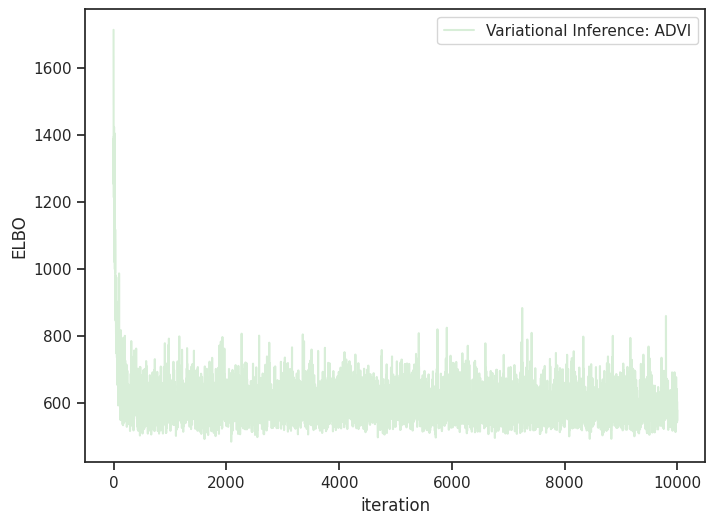

In [760]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [761]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

###Evaluate model on validation data set

In [762]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_val_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_val_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_val_pred).mean(axis=0)

In [763]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_val_pred))

In [764]:
print("MAE = ",(np.mean(abs(y_val_pred_final - yn_val))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - yn_val) / yn_val)))

MAE =  93198.85102875043
MAPE =  0.21364794672075502


We can see from the MAPE, the Bayesian Neural Network has improved performance by 2-3% on the Piecewise regression model above

###Predict new y values for test data

In [765]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [766]:
y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

In [767]:
#We create an output file of the predicted house prices for the test dataset along with their index. This was the file uploaded to kaggle.
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_final})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BNN/' + f"House Price Prediction_{date}.csv", index=False)

# SUMMARY

## E-tivity summary

This e-tivity provided an interesting foray into probabilistic ML to solve complex datasets with a simple and explainable model. Further more this approach coupled very well with a selection of [SKlearn's clustering methods](https://scikit-learn.org/stable/modules/clustering.html) (namely Gaussian mixture models, KMeans clustering models and one of the library's evaluation metrics called the Silhouette coefficient. Using these 3 clustering methods provided a nuanced approach to locate the number and locations of the breakpoints in our multidimensional feature space. I found this approach very interesting that leveraging these clustering methods enabled us to keep the complexity of our model low and enhance our performance.

Using NLP for the firt time was also very interesting. It is a hugely powerful topic that can generate so many features in a dataset, analyse so much text. However, one of the most important pieces in the data prep was to run the XGBoost 


 <br/><br/>

---

### Conclusions & Results
The full probabilistic regression model and BNN was outperformed by the piecewise probabilitistic regression model using the mean absolute error (MAE) and mean absolute percentage error (MAPE) as evaluation criterion.


|With NLP      | Full regression model | Piecewise model |BNN |
|------|------------|-----------------|---------------|
| MAE  | 103684    | 83,289         | 91,660         |
| MAPE | 0.218      | 0.173           | 0.208.        |

The values for MAPe with vesus without NLP

|     | Full regression model | Piecewise model |BNN |
|------|------------|-----------------|---------------|
| Without NLP   | 0.25    | 0.21         | 0.208       |
| With NLP | 0.218      | 0.173           | 0.208        |

We can see the NLP had a big affect on the performnance of the regression models, however it did not seem to have any effect on the BNN.

### Comments and problems
- NLP has some difficulties using n-grams where you had to ensure a feature appeared in both training and testing. Until we ran the XGBoost with feature importance, the columns were not matching. I can see how this would be difficult to work with in production and with constant retraining of models. The situation where XGBoost suggested an important feature that wasn't generated by the NLP pipeline with the test data is a real circumstance I can see happening.
- Ray Beechinor's notebook and the medium article he linked [ https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460]( https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460) was extremely useful and I discovered using n grams for the first time.
- Also using XGBoost to reduce the features was really a great approach, I learnt this from Robert Barrett's works and posts on the forum.


# References
- Chang, D. T. (2021). Bayesian Neural Networks: Essentials. ArXiv:2106.13594 [Cs]. http://arxiv.org/abs/2106.13594
- Dios, E.C.D. (2020) From DataFrame to N-Grams [online], Medium, available: https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460 [accessed 19 Oct 2021].
- (Dorpe, 2018), Preprocessing with sklearn: a complete and comprehensive guide https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
- (Germano, 2020), When a single line is not enough to fit our data, piecewise linear regression can come to our rescue. https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452
- (Google Machine Learning Crash Course), Feature Crosses: Encoding Nonlinearity https://developers.google.com/machine-learning/crash-course/
feature-crosses/crossing-one-hot-vectors
- Loper, E., & Bird, S. (2002). NLTK: The Natural Language Toolkit. Proceedings of the ACL-02 Workshop on Effective Tools and Methodologies for Teaching Natural Language Processing and Computational Linguistics - Volume 1, 63–70. https://doi.org/10.3115/1118108.1118117
- (Half-Cauchy Distribution — Probability Distribution Explorer Documentation, n.d.) https://distribution-explorer.github.io/continuous/halfcauchy.html
- Srihari, S. (n.d.). Bayesian Neural Networks. Machine Learning, 16. [https://cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.7-BayesianNeuralNetworks.pdf](https://cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.7-BayesianNeuralNetworks.pdf)
- (Rousseeuw, P. J. 1987), Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20(C), 53–65. https://doi.org/10.1016/0377-0427(87)90125-7

In [768]:
#Export PDF file of the notebook to Google drive
%%capture
pdf_path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/pdf/'
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Copy of ET5003_workinprogress.ipynb')